In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

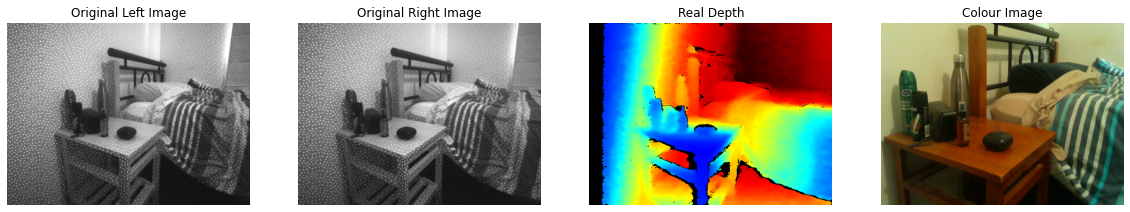

In [5]:
pair_number = 12
imgR = cv2.imread("3D_images/ImagePair{}-{}.png".format(pair_number, 1))
imgL = cv2.imread("3D_images/ImagePair{}-{}.png".format(pair_number, 0))
real_depth = cv2.imread("3D_images/ImagePair{}-{}.png".format(pair_number, 2))
col_img = cv2.imread("3D_images/ImagePair{}-{}.png".format(pair_number, 3))
col_img = cv2.cvtColor(col_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(imgL)
ax[0].set_title("Original Left Image")
ax[0].axis("off")
ax[1].imshow(imgR)
ax[1].set_title("Original Right Image")
ax[1].axis("off")
ax[2].imshow(real_depth)
ax[2].set_title("Real Depth")
ax[2].axis("off")
ax[3].imshow(col_img)
ax[3].set_title("Colour Image")
ax[3].axis("off")
plt.show()

In [7]:
# setting up stereo matching algorithm
left_matcher = cv2.StereoBM_create()

left_matcher.setMinDisparity(0)
left_matcher.setNumDisparities(64)
left_matcher.setBlockSize(17)
left_matcher.setSpeckleRange(16)
left_matcher.setSpeckleWindowSize(200)

right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

In [743]:
# converting iamges to gray and computing disparity
grayLeft = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
grayRight = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

left_disp = left_matcher.compute(grayLeft, grayRight)
right_disp = right_matcher.compute(grayRight, grayLeft)

In [744]:
# default (4,1000) or (10, 1)
sigma = 2
lmbda = 100

# Now create DisparityWLSFilter
wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)
filtered_disp = wls_filter.filter(left_disp, grayLeft, disparity_map_right=right_disp)

In [745]:
left_disp = left_disp[17:-17, 64+17:-17]
left_disp = cv2.resize(left_disp, (640, 480), cv2.INTER_AREA)
left_disp = left_disp.max()-left_disp
left_disp = cv2.normalize(left_disp, left_disp, 0, 255, cv2.NORM_MINMAX)

filtered_disp = filtered_disp[17:-17, 64+17:-17]
filtered_disp = cv2.resize(filtered_disp, (640, 480), cv2.INTER_AREA)
filtered_disp = filtered_disp.max()-filtered_disp
filtered_disp = cv2.normalize(filtered_disp, filtered_disp, 0, 255, cv2.NORM_MINMAX)
filtered_disp[filtered_disp > 200] = 200 

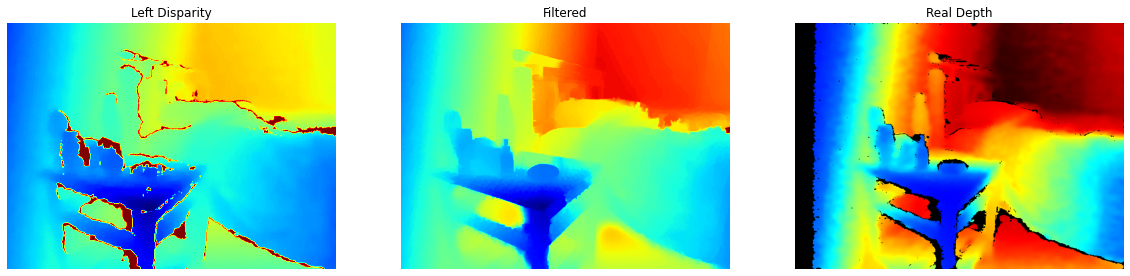

In [746]:
# Displaying the disparity map
fig, ax = plt.subplots(1,3,figsize=(20,10))

ax[0].imshow(left_disp, cmap='jet')
ax[0].set_title("Left Disparity")
ax[0].axis("off")

ax[1].imshow(filtered_disp, cmap='jet')
ax[1].set_title("Filtered")
ax[1].axis("off")

ax[2].imshow(real_depth, cmap='jet')
ax[2].set_title("Real Depth")
ax[2].axis("off")

plt.show()

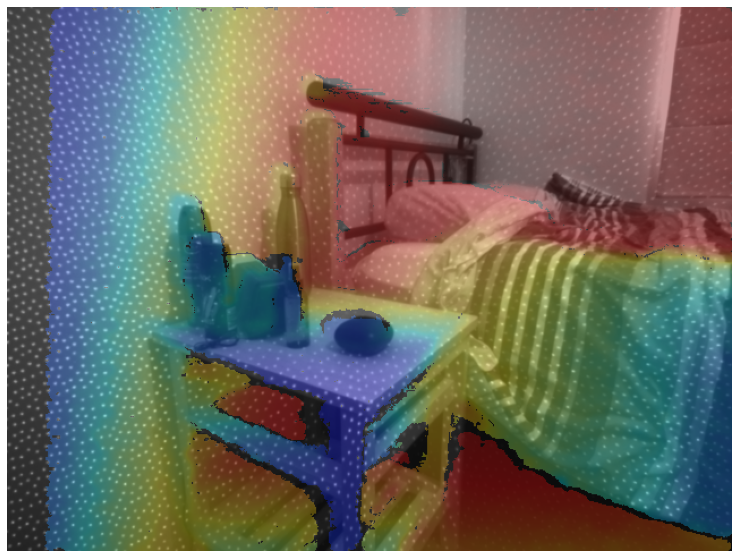

In [747]:
added_image = cv2.addWeighted(imgL,0.6,real_depth,0.3,0)
fig,ax=plt.subplots(figsize=(20,10))
ax.imshow(added_image)
ax.axis("off")
plt.show()